In [2]:
import numpy as np
import ase
import os
import numpy as np
import matplotlib.pyplot as plt

from ase import io
from ase.geometry.analysis import Analysis
from ase import build
from ase.neighborlist import neighbor_list
from ase import Atoms
from ase.io import write, read
import re
from quippy.potential import Potential
import pickle
os.chdir('/Users/Moji/Documents/Summer20/Ge')

In [5]:
amo = [ase.Atoms(io.read('/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_cdr/run_64001/NPT/dump_npt_Ge_gap.' + str(i)
                         + '.cfg')) for i in range(220000, 240000, 1000)]
hiT_amo = [ase.Atoms(io.read('/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_cdr/run_64001/NPT/dump_npt_Ge_gap.' + str(i)
                                  + '.cfg')) for i in range(180000, 220000, 1000)]
inter = [ase.Atoms(io.read('/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_cdr/run_64001/NPT/dump_npt_Ge_gap.' + str(i)
                                  + '.cfg')) for i in range(140000, 180000, 1000)]
liquid = [ase.Atoms(io.read('/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_cdr/run_64001/NPT/dump_npt_Ge_gap.'
                            + str(i) + '.cfg')) for i in range(60000, 140000, 1000)]
hiT_liq = [ase.Atoms(io.read('/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_cdr/run_64001/NPT/dump_npt_Ge_gap.'
                            + str(i) + '.cfg')) for i in range(20000, 60000, 1000)]
MD = [amo, hiT_amo, inter, liquid, hiT_liq]

In [ ]:
dia = ase.Atoms(build.bulk('Ge', crystalstructure='diamond', cubic=True))
dia_s = build.make_supercell(dia, [[2, 0, 0],
                                  [0, 2, 0],
                                  [0, 0, 2]])

liq_ana = Analysis(liquid)
amo_ana = Analysis(amo)
dia_ana = Analysis(dia_s)
liq_3b_ana = Analysis(liquid_3b)

liq_rdf = np.average(liq_ana.get_rdf(4.9, 400), axis=0)
amo_rdf = np.average(amo_ana.get_rdf(4.9, 400), axis=0)
dia_rdf = np.average(dia_ana.get_rdf(4.9, 400), axis=0)
liq_3b_rdf = np.average(liq_3b_ana.get_rdf(4.9, 400), axis=0)

liq_n = [neighbor_list('i', i, cutoff=3.0) for i in liquid]
liq_n = [neighbor_list('i', i, cutoff=3.0) for i in liquid_3b]
amo_n = [neighbor_list('i', i, cutoff=3.0) for i in amo]
dia_n = neighbor_list('i', dia_s, cutoff=3.0)


np.average([np.bincount(i) for i in amo_n], axis=0)

np.average([np.bincount(i) for i in liq_n], axis=0)

dists = np.linspace(0, 4.9, 400)
fig, axs = plt.subplots(figsize=(10,10))
axs.scatter(dists, liq_rdf)
axs.scatter(dists, amo_rdf)
axs.scatter(dists, liq_3b_rdf)
#axs.scatter(dists, dia_rdf)
plt.show()

In [ ]:
T_csize_dat = [[i for i in T_set if i.get_global_number_of_atoms() == 64],
               [i for i in T_set if i.get_global_number_of_atoms() == 125],
                [i for i in T_set if i.get_global_number_of_atoms() == 216]]
T_qm_e_cs = [[at.info['dft_energy']/len(at) - zero_e for at in j] for j in T_csize_dat]
T_qm_f_cs = [[i for at in j for i in at.get_array('dft_forces').flatten()] for j in T_csize_dat]

In [ ]:
fig, axs = plt.subplots(figsize=(10,10))
axs.hist(T_qm_e_cs, bins=50, stacked=True, label=['64','125','216'])
plt.legend()
plt.show()

labels = [240, 120, 20, 180, 160]

In [50]:
ans2 = [[Analysis(j) for j in i] for i in T_configs_s]
ans = [[Analysis(j) for j in i] for i in MD]
rdf = [np.average(np.array([i.get_rdf(4.9, 400) for i in j]), axis=0) for j in ans]
rdf2 = [np.average(np.array([i.get_rdf(4.9, 400) for i in j]), axis=0) for j in ans2]
dists = np.linspace(0, 4.9, 400)

<ipython-input-58-b233ecb9a463>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


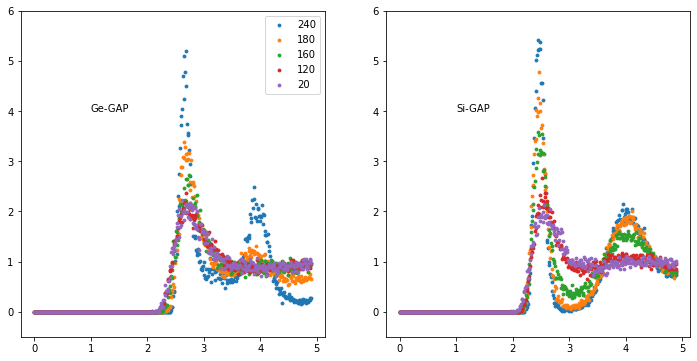

In [58]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
for i in range(len(rdf)):
    axs[0].scatter(dists, rdf[i], label=lab_sort[i], s=8)
    axs[1].scatter(dists, rdf2[i], label=lab_sort[i], s=8)

axs[0].set(ylim=(-0.5,6))
axs[1].set(ylim=(-0.5,6))
axs[0].text(1,4,'Ge-GAP')
axs[1].text(1,4,'Si-GAP')
axs[0].legend()
fig.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/Si-Ge-GAP_rdfs.png')

In [ ]:
lab_sort_rmse = ['{0:>4d}      {1:>5.2f}      {2:>5.3f}'.format(lab_sort[i],
                  rms_dict(T_qm_energies_s[i],T_gap_energies_s[i])['rmse']*1000,
                  rms_dict(T_qm_forces_s[i], T_gap_forces_s[i])['rmse'])
                  for i in range(len(lab_sort))]

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[1].hist(T_qm_forces, bins=500, stacked=False, label=lab_sort_rmse, histtype='step', density=False)
axs[0].hist(T_qm_energies, bins=50, stacked=False, label=lab_sort_rmse, histtype='step', density=False)
axs[1].set(xlabel='DFT Forces / eV/Å', xlim=(-5.0,5.0))
axs[0].set(xlabel='DFT Energies per atom / eV', ylabel='Frequency')
axs[0].legend(title = '    time     $E_{energy}$     $E_{forces}$')
plt.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/timestep_rmse.png')

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[1].hist(T_qm_f_cs, bins=500, stacked=False, label=['64','125','216'], histtype='step', density=True)
axs[0].hist(T_qm_e_cs, bins=50, stacked=False, label=['64','125','216'], histtype='step', density=True)
axs[1].set(xlabel='DFT Forces / eV/Å', xlim=(-5.0,5.0))
axs[0].set(xlabel='DFT Energies / eV', ylabel='Normalised frequency')
plt.legend()
plt.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/normed_distribution_zoom.png')

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[1].hist(T_qm_f_cs, bins=300, stacked=True, label=['64','125','216'])
axs[0].hist(T_qm_e_cs, bins=50, stacked=True, label=['64','125','216'])
axs[1].set(xlabel='DFT Forces / eV/Å')
axs[0].set(xlabel='DFT Energies / eV', ylabel='Frequency')
plt.legend()
plt.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/histogram.png')

In [3]:
import quippy
from ase.build import bulk
from ase.optimize import BFGS
from ase.constraints import UnitCellFilter
from ase.io.trajectory import Trajectory

In [ ]:
hcp = bulk('Ge', 'hcp', a=2.991, b=2.991, c=4.35)
dia = bulk('Ge', 'diamond', a=5.6)
dia.set_calculator(gap)
hcp.set_calculator(gap)
print(hcp.get_total_energy()/len(hcp))
print(dia.get_total_energy()/len(dia))
diaf = UnitCellFilter(dia)
d_dyn = BFGS(diaf, trajectory='/Users/Moji/Documents/Summer20/Ge/Analysis/dia.traj')
d_dyn.run(fmax=0.05)
hcpf = UnitCellFilter(hcp)
h_dyn = BFGS(hcpf, trajectory='/Users/Moji/Documents/Summer20/Ge/Analysis/hcp.traj')
h_dyn.run(fmax=0.05)
hcp_traj = Trajectory('/Users/Moji/Documents/Summer20/Ge/Analysis/hcp.traj')
dia_traj = Trajectory('/Users/Moji/Documents/Summer20/Ge/Analysis/dia.traj')
hcp_opt = hcp_traj[-1]
dia_opt = dia_traj[-1]

hcp_opt.set_calculator(gap)
dia_opt.set_calculator(gap)
print(hcp_opt.get_total_energy()/len(hcp_opt), dia_opt.get_total_energy()/len(dia_opt))

In [113]:
desc = quippy.descriptors.Descriptor('soap average=T l_max=6 n_max=12 atom_sigma=0.5 zeta=4 \
                              cutoff=5.0 cutoff_transition_width=1.0 \
                              central_weight=1.0 n_sparse=5000 delta=0.1 \
                              f0=0.0 covariance_type=dot_product \
                              sparse_method=CUR_POINTS')

'''energy_parameter_name=dft_energy force_parameter_name=dft_forces \
virial_parameter_name=NOT_USED \
sparse_jitter=1.0e-8 \
default_sigma={0.001 0.1 0.05 0.0}'''

'energy_parameter_name=dft_energy force_parameter_name=dft_forces virial_parameter_name=NOT_USED sparse_jitter=1.0e-8 default_sigma={0.001 0.1 0.05 0.0}'

In [118]:
np.shape(desc.calc(d155.V_configs[0][0])['data'])

(1, 547)

In [119]:
descs = [desc.calc_descriptor(i) for i in flatten(d155.V_configs)]
#MD_descs = [desc.calc_descriptor(i) for i in flatten(MD)]

In [120]:
tdat = descs #+ MD_descs

In [133]:
np.shape(tdat[0][0])

(547,)

In [146]:
mat = np.array([[2-2*np.dot(i[0]**4, j[0]**4) for j in tdat] for i in tdat])

In [147]:
np.shape(mat)

(69, 69)

In [148]:
configs = d155.V_configs
config_flat_indices = [0]
for i in configs:
    config_flat_indices.append(len(i) + config_flat_indices[-1])

config_flat_indices.append(None)

In [149]:
config = d155.V_configs

symbols = ['x' for i in configs]
colormap = plt.get_cmap('plasma')
colors = [colormap(i) for i in np.linspace(0, 0.8, len(configs))]

#colormap2 = plt.get_cmap('viridis')
#colors.extend([colormap(i) for i in np.linspace(0, 0.8, len(labels[-len(MD):]))])

In [127]:
from sklearn import decomposition

Exception ignored in: <function descriptor.__del__ at 0x1243db940>
Traceback (most recent call last):
  File "/Users/Moji/Applications/QUIP/build/darwin_x86_64_gfortran/quippy/descriptors_module.py", line 7742, in __del__
    _quippy.f90wrap_descriptor_finalise(this=self._handle, error=error)
TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'


In [150]:
pca = decomposition.PCA(n_components=2)
pca.fit(mat)

PCA(n_components=2)

In [151]:
map = pca.fit_transform(mat)

<ipython-input-156-45019e66b8cc>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


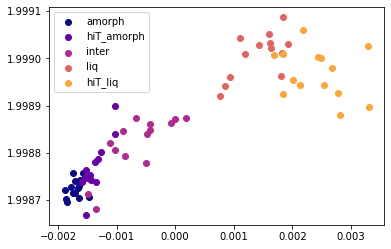

In [156]:
fig, ax = plt.subplots()
cfi = config_flat_indices
for i in range(len(config)):
    ax.scatter(map.T[0][cfi[i]:cfi[i+1]], mat.T[1][cfi[i]:cfi[i+1]],
               color=colors[i], label=d155.config_labels[i])
ax.legend()
fig.show()


In [3]:
fig, ax = plt.subplots()
for i in range(len(ds)-1):
    ax.scatter(map.T[0][ds[i]:ds[i+1]], mat.T[1][ds[i]:ds[i+1]],
               color=colors[i], label=lab_sort[i], s=10, marker=symbols[i])
ax.legend()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
fig.show()
#fig.savefig('./Analysis/similarity_map_exp.png', dpi=300)

NameError: name 'plt' is not defined

ValueError: operands could not be broadcast together with shapes (56,) (15864,) 

In [44]:
d155.data_dict['QM_V_t'][0][0]

array([[  8.44017363,  -2.36454054,   1.78758717],
       [ -2.36454054,  13.34803232,   1.68922878],
       [  1.78758717,   1.68922878, -13.14022519]])

In [17]:
flatten = lambda l: [item for sublist in l for item in sublist]
stress_t = []
stress_Si = []
for i in flatten(d155.data_dict['QM_V_t']):
    stress_t.append(np.trace(i))
for i in flatten(Si.data_dict['QM_V_t']):
    if np.any(i):
        stress_Si.append(np.trace(i))


<ipython-input-24-5c563467a0e9>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


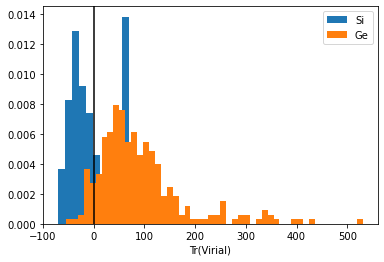

In [24]:
fig, axs = plt.subplots()
axs.hist(stress_Si, bins=10, density=True, label='Si')
axs.hist(stress_t, bins=50, density=True, label='Ge')
axs.axvline(0, color='k')
axs.set(xlabel='Tr(Virial)')
axs.legend()
fig.show()
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/virial_dist.png')

In [34]:

T_set[0].info['dft_virial']

array([[  8.44017363,  -2.36454054,   1.78758717],
       [ -2.36454054,  13.34803232,   1.68922878],
       [  1.78758717,   1.68922878, -13.14022519]])

In [4]:
%load_ext autoreload
%autoreload 2

In [79]:
from Ge_calculation import GAP


data_dir = '/Users/Moji/Documents/Summer20/Ge/'
train_file = data_dir + 'Structure_databases/train_216_125_64_v.xyz'
val_file = data_dir + 'Structure_databases/validate_216_125_64_v.xyz'
pickle_file = data_dir + 'Pickles/data_125_216_d155'
pot = data_dir + 'Potentials/Ge_2bSOAP_5000_125_216_d155/Ge_2bSOAP_5000_125_216_d155.xml'
pot_v = data_dir + 'Potentials/Ge_2bSOAP_5000_125_216_d155_v/Ge_2bSOAP_5000_125_216_d155_v.xml'

In [6]:
Si_xyz = '/Users/Moji/Documents/Summer20/Ge/Si_GAP_training/libAtoms-silicon-testing-framework-fc252cb/models/GAP/gp_iter6_sparse9k.xml.xyz'

In [8]:
Si = GAP(Si_xyz, parameter_names=('dft_energy', 'dft_force', 'virial'))

Training set structure count: 2442
fixing virials
Config labels: ['sh', 'dia', 'bt', 'liq', 'amorph', 'surface_001', 'surface_110', 'surface_111', 'surface_111_pandey', 'crack_110_1-10', 'crack_111_1-10', 'sp', 'sp2', 'interstitial', 'screw_disloc', 'divacancy', 'vacancy', '111adatom', 'surface_111_3x3_das', 'decohesion', 'bc8', 'bcc', 'fcc', 'hcp', 'hex_diamond', 'st12']


In [7]:
from ase.io import read
for i in range(2442):
    try:
        a = read(Si_xyz, index=i)
        b = a.info['dft_energy']
    except:
        print(i, a.info['config_type'])

111 sh
112 sh
113 sh
114 sh
115 sh
116 sh
117 sh
118 sh
119 sh
120 sh
121 sh
122 sh
123 sh
124 sh
125 sh
126 sh
127 sh
128 sh
129 sh
130 sh
131 sh
132 sh
133 sh
134 sh
135 sh
136 sh
137 sh
138 sh
139 sh
140 sh
141 sh
142 sh
143 sh
144 sh
145 sh
146 sh
147 sh
148 sh
149 sh
150 sh
151 sh
152 sh
153 sh
154 sh
155 sh
156 sh
157 sh
158 sh
159 sh
160 sh
161 sh
162 sh
163 sh
164 sh
165 sh
166 sh
167 sh
168 sh
169 sh
170 sh


In [80]:
d155_v = GAP(train_file, val_file, pot_v)
d155_v.calc()

Training set structure count: 281
Validation set structure count: 70
Read configs, now fixing virials
Config labels: ['amorph', 'liq', 'hiT_liq', 'hiT_amorph', 'inter']
Config amorph done
Config liq done
Config hiT_liq done
Config hiT_amorph done
Config inter done
Config amorph done
Config liq done
Config hiT_liq done
Config hiT_amorph done
Config inter done


In [63]:
d155 = GAP(train_file, val_file, pot)

Training set structure count: 281
Validation set structure count: 70
Read configs, now fixing virials
Config labels: ['amorph', 'liq', 'hiT_liq', 'hiT_amorph', 'inter']


In [64]:
d155.calc()

Config amorph done
Config liq done
Config hiT_liq done
Config hiT_amorph done
Config inter done
Config amorph done
Config liq done
Config hiT_liq done
Config hiT_amorph done
Config inter done


In [82]:
d155_v.analyse(train=True, sorted_order=[0,3,4,1,2])

3
New order:  ['amorph', 'hiT_amorph', 'inter', 'liq', 'hiT_liq']


In [72]:
d155.analyse(train=True, sorted_order=[0, 3, 4, 1, 2])

['/Users/Moji/PycharmProjects/Ge_analysis_local', '/Users/Moji/PycharmProjects/Ge_analysis_local', '/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python38.zip', '/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8', '/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/lib-dynload', '', '/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages', '/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/matscipy-0.4.0+32.g356b21e-py3.8-macosx-10.9-x86_64.egg', '/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/IPython/extensions', '/Users/Moji/.ipython', '/Users/Moji/Applications/QUIP/build/darwin_x86_64_gfortran']
3
New order:  ['amorph', 'hiT_amorph', 'inter', 'liq', 'hiT_liq']


In [169]:
from Ge_analysis import energy_error, forces_error, virials_error,\
    abs_energy_error, abs_force_error, abs_virial_error, dens_error_plot, similarity_map

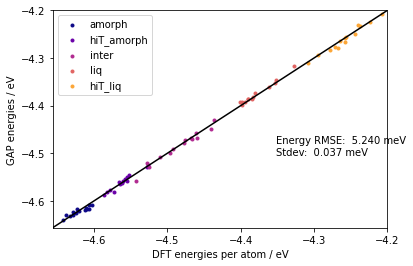

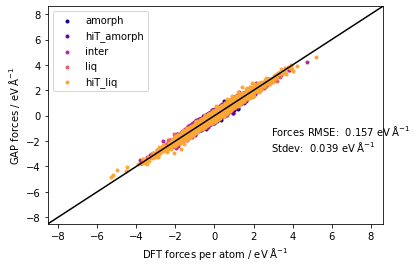

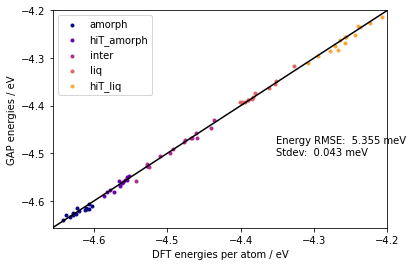

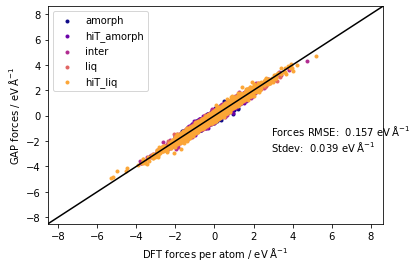

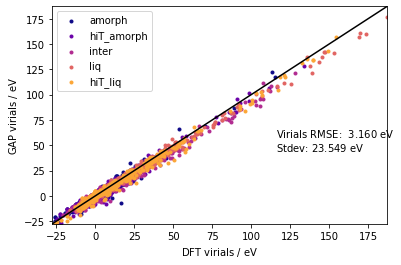

In [85]:
energy_error(d155)
forces_error(d155)
energy_error(d155_v)
forces_error(d155_v)

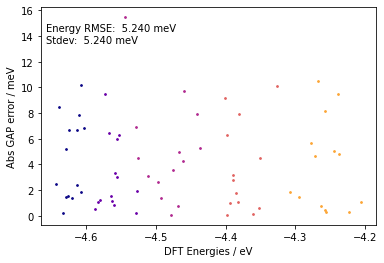

In [23]:
virials_error(d155_v, file='/Users/Moji/Documents/Summer20/Ge/Analysis/virial_error_v.png')

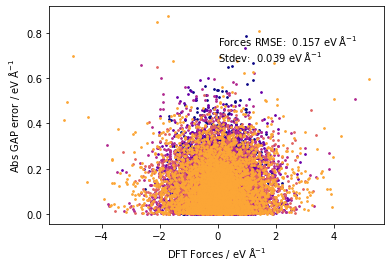

In [30]:
abs_energy_error(d155)

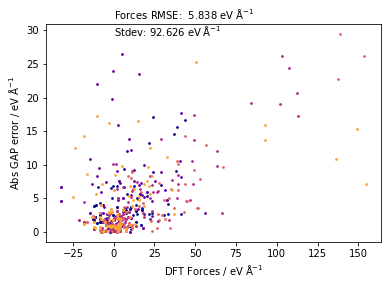

In [33]:
abs_force_error(d155)

/Users/Moji/PycharmProjects/Ge_analysis_local/Ge_analysis.py:259: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  escat = ax[0].scatter(x[0], y[0], c=z[0], cmap=plt.get_cmap('plasma'),
/Users/Moji/PycharmProjects/Ge_analysis_local/Ge_analysis.py:269: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  fscat = ax[1].scatter(x[1], y[1], c=z[1], cmap=plt.get_cmap('plasma'),


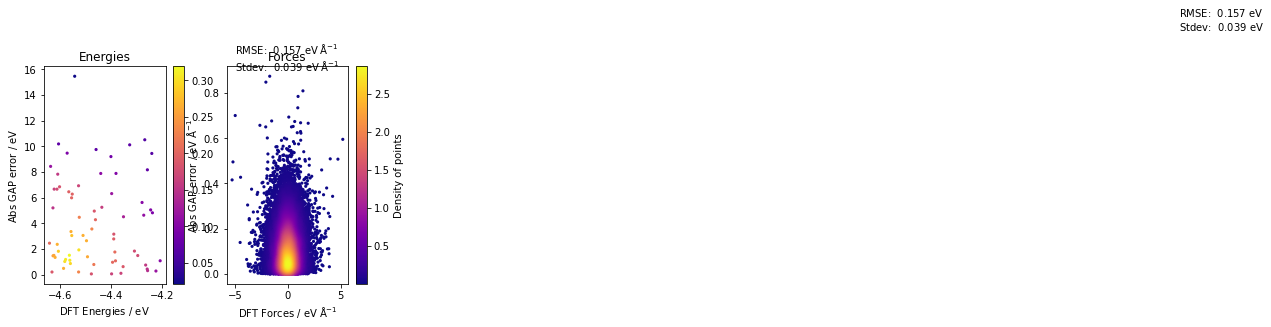

In [38]:
abs_virial_error(d155)

In [78]:
dens_error_plot(d155)

In [57]:
d155.save('/Users/Moji/Documents/Summer20/Ge/Pickles/d155')

In [88]:
d155.load('/Users/Moji/Documents/Summer20/Ge/Pickles/d155')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


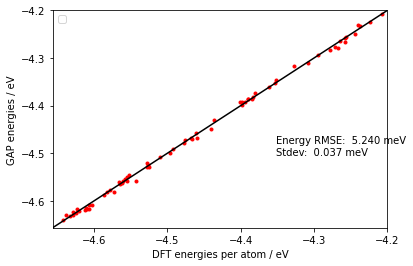

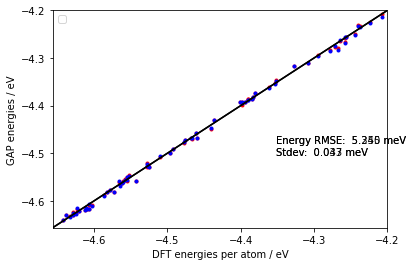

In [91]:
d155_v.save('/Users/Moji/Documents/Summer20/Ge/Pickles/d155_v')

In [159]:
dfig, dax = plt.subplots()
energy_error(d155, ax=dax, by_config=False, color='r')
energy_error(d155_v, ax=dax, by_config=False, color='b')
dfig

TypeError: 'str' object is not callable

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calc_connect',
 '_quip_descriptor',
 'calc',
 'calc_descriptor',
 'count',
 'cutoff',
 'dimensions',
 'get_n_perm',
 'n_dim',
 'n_perm',
 'permutations',
 'sizes']

In [163]:
desc


<method-wrapper '__repr__' of Descriptor object at 0x12c0ff430>

In [164]:
desc.__repr__


[autoreload of Ge_calculation failed: Traceback (most recent call last):
  File "/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Caskroom/miniconda/base/envs/QUIP/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen imp

AttributeError: 'function' object has no attribute 'outer'

In [165]:
descs = np.array(descs)
np.dot.outer(descs[0], descs[0])

TypeError: descriptor 'outer' for 'numpy.ufunc' objects doesn't apply to a 'numpy.ndarray' object

In [168]:
np.ufunc.outer(descs[0], descs[0
])

array([[-3.45101328e-03,  4.21833204e-04],
       [-3.29282214e-03, -3.89547448e-04],
       [-3.38094016e-03,  5.89988618e-05],
       [-3.60603235e-03, -2.26309649e-05],
       [-3.36378786e-03, -4.98841154e-04],
       [-3.57426553e-03, -1.21526083e-04],
       [-3.55636450e-03, -3.32861984e-04],
       [-3.61776540e-03, -7.28544243e-04],
       [-3.24527610e-03, -2.48003067e-04],
       [-3.28421678e-03, -3.01435103e-04],
       [-3.65905172e-03,  2.93120609e-04],
       [-3.45857488e-03, -4.58451692e-04],
       [-3.79546914e-03,  3.85883469e-04],
       [-3.56825552e-03, -8.17895872e-05],
       [-3.64661377e-03, -7.10844198e-04],
       [-3.45397108e-03, -7.79144608e-04],
       [-3.23600806e-03,  2.09653542e-04],
       [-3.66135138e-03, -8.73034293e-05],
       [-3.69262883e-03,  1.99056038e-04],
       [-3.52331123e-03, -2.65380058e-04],
       [-3.74718282e-03,  3.77761059e-04],
       [-3.48675259e-03, -5.13929976e-04],
       [-3.21003426e-03, -4.18449488e-04],
       [-3.

In [169]:
d155.calc_similarity()

In [ ]:
similarity_map(d155)